In [9]:
#Fastenzeit Datum
FEATURES = [
    'Temperatur',
    'Windgeschwindigkeit',
    'KielerWoche',

    # 'Umsatz_lag_1',
    # 'Umsatz_lag_7',
    # 'Umsatz_rolling_7',

    'WettercodeExtremwetter',
    'WettercodeDunst',
    'WettercodeKlar',
    'WettercodeNachSchlechtemWetter',
    'WettercodeNebel',
    'WettercodeRegen',
    'WettercodeSchnee',

    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread',

    'WochentagFreitag',
    'WochentagSamstag',
    'WochentagSonntag',
    'WochentagUnterDerWoche',

    'Januar',
    'Februar',
    'Maerz',
    'April',
    'Mai',
    'Juni',
    'Juli',
    'August',
    'September',
    'Oktober',
    'November',
    'Dezember',
    
    'BewoelkungWolkenBedeckt',
    'BewoelkungWolkenBewoelkt',
    'BewoelkungWolkenKlar',
    
    'FeiertagChristiHimmelfahrt',
    'FeiertagErsterMai',
    'FeiertagOstermontag',
    'FeiertagPfingstmontag',
    'FeiertagTagDerDeutschenEinheit',
    'FeiertagHeiligabend',
    'FeiertagSilvester',
    'TagVorFeiertag',
    'Fastenzeit',

]

In [10]:
import pandas as pd
import numpy as np

In [11]:
train_data = pd.read_csv('../0_DataPreparation/data/data_versuch/train_data.csv')
val_data = pd.read_csv('../0_DataPreparation/data/data_versuch/validation_data.csv')
test_data = pd.read_csv('../0_DataPreparation/data/data_versuch/test_data.csv')

X_train = train_data[FEATURES]
y_train = train_data['Umsatz']

X_val = val_data[FEATURES]
y_val = val_data['Umsatz']

X_test = test_data[FEATURES]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 192 (768.00 B)

In [14]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 64695.0039 - val_loss: 54170.2969
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61582.2227 - val_loss: 51641.7656
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57506.6406 - val_loss: 47731.8203
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 52882.3867 - val_loss: 43871.0430
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47649.3320 - val_loss: 39754.8398
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42157.7070 - val_loss: 34859.7773
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36733.4688 - val_loss: 30543.5762
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31738.4023 - val_loss: 24920.6133
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27124.4941 - val_loss: 21220.1523
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22580.4004 - val_loss: 18221.1719
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19017.746

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE: {rmse:.2f}")


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation RMSE: 49.49


In [16]:
test_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': test_pred.flatten()
})

submission.to_csv('../0_DataPreparation/data/submission_nn_clara_02.csv', index=False)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


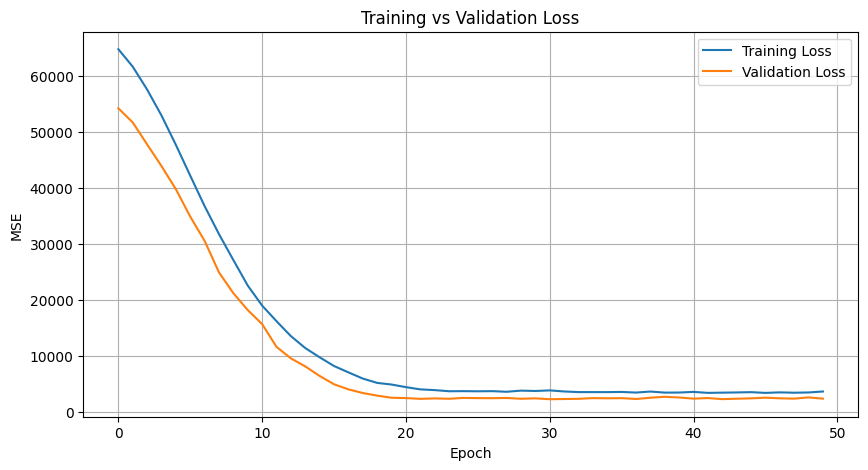

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import numpy as np

def mape(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

y_val_pred = model.predict(X_val_scaled)

val_mape = mape(y_val, y_val_pred)
print(f"Validation MAPE (overall): {val_mape:.2f}%")



 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAPE (overall): 21.90%


In [19]:
val_results = val_data.copy()
val_results['y_true'] = y_val.values
val_results['y_pred'] = model.predict(X_val_scaled).flatten()

for wg in [
    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread'
]:
    subset = val_results[val_results[wg] == 1]
    mape_wg = mape(subset['y_true'], subset['y_pred'])
    print(f"{wg}: {mape_wg:.2f}%")



58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
WarengruppeBread: 20.98%
WarengruppeRolls: 16.15%
WarengruppeCroissants: 20.95%
WarengruppeConfectionery: 26.89%
WarengruppeCake: 17.24%
WarengruppeSeasonalBread: 68.09%


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersagen machen
y_train_pred = model.predict(X_train_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Metriken berechnen
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name}:")
    print(f"  MAE:  {mae:.2f} € (durchschnittlicher Fehler)")
    print(f"  RMSE: {rmse:.2f} € (bestraft große Fehler stärker)")
    print(f"  R²:   {r2:.3f} (0-1, höher = besser)")
    print(f"  MAPE: {mape:.2f} % (Fehler in Prozent)")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")

 56/234 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Training:
  MAE:  29.29 € (durchschnittlicher Fehler)
  RMSE: 42.45 € (bestraft große Fehler stärker)
  R²:   0.917 (0-1, höher = besser)
  MAPE: 18.09 % (Fehler in Prozent)

Validation:
  MAE:  34.37 € (durchschnittlicher Fehler)
  RMSE: 49.49 € (bestraft große Fehler stärker)
  R²:   0.856 (0-1, höher = besser)
  MAPE: 21.90 % (Fehler in Prozent)
